In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


Version of the analysis code which only looks at the histograms stored in the data file. This will be the only version which is possible when analyzing the full dataset (unless you want a 1 TB root file to loop through)

In [2]:
#f = r.TFile("./data/results_histOnly_60hUnblinding_goldenruns.root") #newer version of the code (v9_10 with energy update), but only one file
f = r.TFile("./data/results_histOnly_60hUnblinding_150usTimeCut_GoldenRuns.root")

In [3]:
f.cd("farline")

True

---

Lets first look at the comparison plots

In [4]:
evwEnergyEvW = f.Get("farline").Get("evwEnergyEvW").Clone()
wveEnergyEvW = f.Get("farline").Get("wveEnergyEvW").Clone()

0.0 3.0
0.0


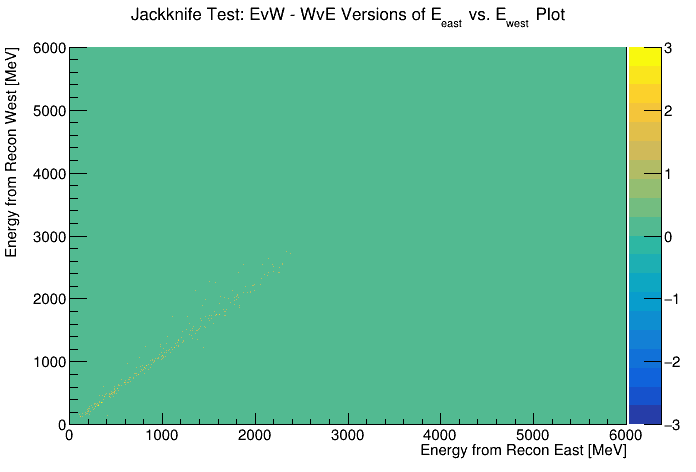

In [5]:
jackknife_EvW = evwEnergyEvW.Clone("jackknife_EvW")
jackknife_EvW.Reset()
jackknife_EvW.Add(evwEnergyEvW, 1)
jackknife_EvW.Add(wveEnergyEvW, -1)
jackknife_EvW.SetTitle("Jackknife Test: EvW - WvE Versions of E_{east} vs. E_{west} Plot")
c3 = r.TCanvas()

#r.gStyle.SetPalette(104)
colorMin = r.Double(0.0)
colorMax = r.Double(0.0)

jackknife_EvW.GetMinimumAndMaximum(colorMin, colorMax)
print(colorMin,colorMax)
print(np.abs(colorMin))
if( np.abs(colorMin) > np.abs(colorMax) ):
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMin), np.abs(colorMin))
else:
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMax), np.abs(colorMax))    


jackknife_EvW.Draw("COLZ")

#onetoone.Draw("SAME")
#c3.SetLogz()
c3.Draw()

In [6]:
from array import array

def set_palette(name="palette", ncontours=999): #http://ultrahigh.org/2007/08/making-pretty-root-color-palettes/

    setPalette = True
    
    if name == "gray" or name == "grayscale":
        stops = [0.00, 0.34, 0.61, 0.84, 1.00]
        red   = [1.00, 0.84, 0.61, 0.34, 0.00]
        green = [1.00, 0.84, 0.61, 0.34, 0.00]
        blue  = [1.00, 0.84, 0.61, 0.34, 0.00]
    elif name == "bidir":
        stops = [0.00, 0.50, 1.00]
        red   = [0.00, 1.00, 0.87]
        green = [0.00, 1.00, 0.00]
        blue  = [0.87, 1.00, 0.00]
    else:
        setPalette = False

    if(setPalette):
        s = array('d', stops)
        r1 = array('d', red)
        g = array('d', green)
        b = array('d', blue)

        npoints = len(s)
        r.TColor.CreateGradientColorTable(npoints, s, r1, g, b, ncontours)
        r.gStyle.SetNumberContours(ncontours)
    else:
        #restore defaults
        r.gStyle.SetPalette(1)

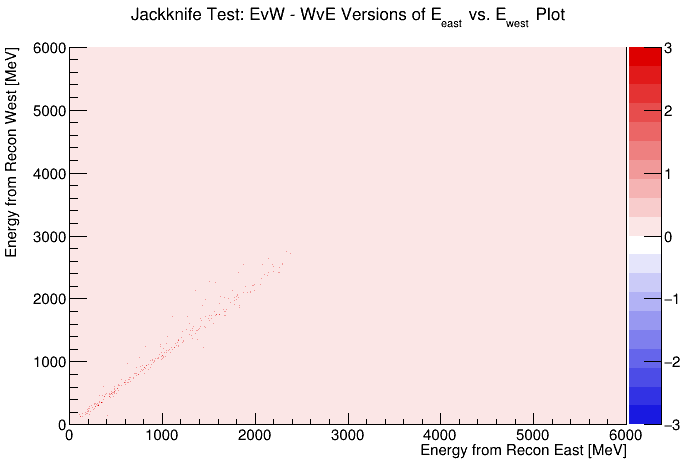

In [7]:
c = r.TCanvas()
set_palette("bidir",999)
jackknife_EvW.Draw("COLZ")
c.Draw()

0.0 3.0


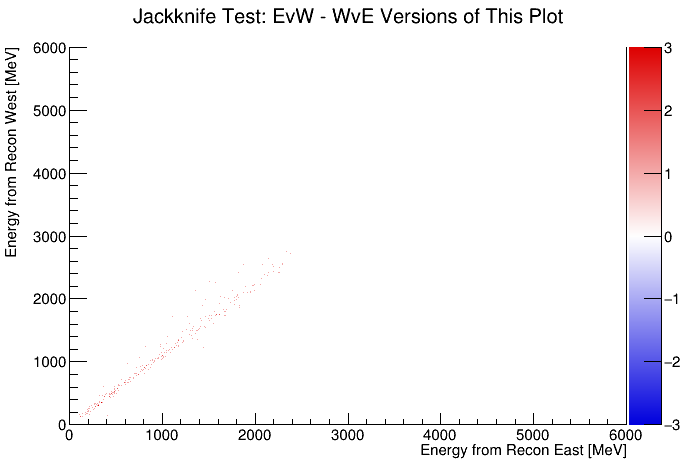

In [8]:
jackknife_EvW = evwEnergyEvW.Clone("jackknife_EvW")
jackknife_EvW.Reset()
jackknife_EvW.Add(evwEnergyEvW, 1)
jackknife_EvW.Add(wveEnergyEvW, -1)
jackknife_EvW.SetTitle("Jackknife Test: EvW - WvE Versions of This Plot")
c3 = r.TCanvas()#"c3","c3",2500,2000)

#jackknife_EvW.Rebin2D(5,5)

#r.gStyle.SetPalette(104)
colorMin = r.Double(0.0)
colorMax = r.Double(0.0)

jackknife_EvW.GetMinimumAndMaximum(colorMin, colorMax)
print(colorMin,colorMax)
if( np.abs(colorMin) > np.abs(colorMax) ):
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMin), np.abs(colorMin))
else:
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMax), np.abs(colorMax))    


jackknife_EvW.Draw("COLZ")

#onetoone.Draw("SAME")
#c3.SetLogz()
c3.Draw()

In [9]:
print(r.TColor.GetPalette())

---

### Now lets do the same for the Early and Late Comparison

In [10]:
r1 = 5
r2 = 5
h1 = f.Get("farline").Get("evwEnergyEvW_Early").Clone()
h1.Rebin2D(r1,r2)
h1.Scale(1/(h1.GetEntries()))

h2 = f.Get("farline").Get("evwEnergyEvW_Late").Clone()
h2.Rebin2D(r1,r2)
h2.Scale(1/(h2.GetEntries()))

ZeroDivisionError: float division by zero

In [ ]:
c = r.TCanvas("c","c",1500,800)
c.Divide(2)
c.cd(1)
h1.Draw("colz")
h1.GetZaxis().SetRangeUser(0.000000000001,1)
r.gPad.SetLogz()
c.cd(2)
h2.GetZaxis().SetRangeUser(0.000000000001,1)
h2.Draw("colz")
r.gPad.SetLogz()

c.Draw()

In [ ]:
jackknife_EvW = h1.Clone("jackknife_EvW")
jackknife_EvW.Reset()
jackknife_EvW.Add(h1, 1)
jackknife_EvW.Add(h2, -1)
jackknife_EvW.SetTitle("Jackknife Test: EvW - WvE Versions of This Plot")
c3 = r.TCanvas()

r.gStyle.SetPalette(104)
colorMin = r.Double(0.0)
colorMax = r.Double(0.0)

jackknife_EvW.GetMinimumAndMaximum(colorMin, colorMax)
print(colorMin,colorMax)
print(np.abs(colorMin))
if( np.abs(colorMin) > np.abs(colorMax) ):
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMin), np.abs(colorMin))
else:
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMax), np.abs(colorMax))    


jackknife_EvW.Draw("COLZ")

#onetoone.Draw("SAME")
#c3.SetLogz()
c3.Draw()

In [ ]:
from array import array

def set_palette(name="palette", ncontours=999): #http://ultrahigh.org/2007/08/making-pretty-root-color-palettes/

    setPalette = True
    
    if name == "gray" or name == "grayscale":
        stops = [0.00, 0.34, 0.61, 0.84, 1.00]
        red   = [1.00, 0.84, 0.61, 0.34, 0.00]
        green = [1.00, 0.84, 0.61, 0.34, 0.00]
        blue  = [1.00, 0.84, 0.61, 0.34, 0.00]
    elif name == "bidir":
        stops = [0.00, 0.50, 1.00]
        red   = [0.00, 1.00, 0.87]
        green = [0.00, 1.00, 0.00]
        blue  = [0.87, 1.00, 0.00]
    else:
        setPalette = False

    if(setPalette):
        s = array('d', stops)
        r1 = array('d', red)
        g = array('d', green)
        b = array('d', blue)

        npoints = len(s)
        r.TColor.CreateGradientColorTable(npoints, s, r1, g, b, ncontours)
        r.gStyle.SetNumberContours(ncontours)
    else:
        #restore defaults
        r.gStyle.SetPalette(57)

In [ ]:
c = r.TCanvas()
set_palette("bidir",999)
jackknife_EvW.Draw("COLZ")
c.Draw()

In [ ]:
jackknife_EvW = h1.Clone("jackknife_EvW")
jackknife_EvW.Reset()
jackknife_EvW.Add(h1, 1)
jackknife_EvW.Add(h2, -1)
jackknife_EvW.SetTitle("Jackknife Test: Early - Late")
c3 = r.TCanvas()#"c3","c3",2500,2000)

#jackknife_EvW.Rebin2D(5,5)

#r.gStyle.SetPalette(104)
colorMin = r.Double(0.0)
colorMax = r.Double(0.0)

jackknife_EvW.GetMinimumAndMaximum(colorMin, colorMax)
print(colorMin,colorMax)
if( np.abs(colorMin) > np.abs(colorMax) ):
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMin), np.abs(colorMin))
else:
    jackknife_EvW.GetZaxis().SetRangeUser(-1*np.abs(colorMax), np.abs(colorMax))    


jackknife_EvW.Draw("COLZ")

#onetoone.Draw("SAME")
#c3.SetLogz()
c3.Draw()

In [ ]:
jackknife_EvW_pos = jackknife_EvW.Clone("jackknife_EvW_pos")
jackknife_EvW_pos.SetTitle("Jackknife Test: Early - Late Positive Values")

jackknife_EvW_neg = jackknife_EvW.Clone("jackknife_EvW_neg")
jackknife_EvW_neg.SetTitle("Jackknife Test: Early - Late Negative Values")

func = r.TF1("func","1",0,10000000)
jackknife_EvW_neg.Multiply(func,-1)

set_palette("DEFAULT")

z1 = 0.00000000001
z2 = jackknife_EvW_pos.GetMaximum()

jackknife_EvW_neg.GetZaxis().SetRangeUser(z1,z2)
jackknife_EvW_pos.GetZaxis().SetRangeUser(z1,z2)

c = r.TCanvas("c","c",1500,600)
c.Divide(2)
c.cd(1)
r.gPad.SetLogz()

jackknife_EvW_pos.Draw("COLZ")

c.cd(2)
jackknife_EvW_neg.Draw("COLZ")
r.gPad.SetLogz()
#onetoone.Draw("SAME")
#c3.SetLogz()
c.Draw()